In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/WDD/dataset'

In [ ]:
# Clone Darknet repo
!git clone https://github.com/AlexeyAB/darknet.git

# Change the makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# Compile Darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15851 (delta 5), reused 7 (delta 2), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.38 MiB | 11.03 MiB/s, done.
Resolving deltas: 100% (10675/10675), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set

In [ ]:
# Copy configuration and data files from Drive to the darknet folder
!cp /content/drive/MyDrive/WDD/data/obj.data /content/darknet/data/
!cp /content/drive/MyDrive/WDD/data/obj.names /content/darknet/data/
!cp /content/drive/MyDrive/WDD/data/train.txt /content/darknet/data/
!cp /content/drive/MyDrive/WDD/data/valid.txt /content/darknet/data/
!cp /content/drive/MyDrive/WDD/cfg/yolov4-custom.cfg /content/darknet/cfg/

In [ ]:
!cp /content/drive/MyDrive/WDD/weights/yolov4.conv.137 /content/darknet/

In [ ]:
%cd /content/darknet
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /content/drive/MyDrive/WDD/backup/yolov4-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 8116939, rewritten_bbox = 0.964009 % 

 Tensor Cores are used.
9933/10000: loss=1.9 hours left=0.3
 9933: 1.857460, 2.965632 avg loss, 0.000013 rate, 9.721039 seconds, 635712 images, 0.275106 hours left
Loaded: 0.000083 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000117, iou_loss = 0.000000, total_loss = 0.000117 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.592932), count: 5, class_loss = 0.974924, iou_loss = 1.301187, total_loss = 2.276111 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.796802), count: 21, class_loss = 2.407860, iou_loss = 1.438418, total_loss = 3.846278 
 total_bbox = 8116965, rewritten_bbox = 0.964006 % 

 Wrong annotation: x = 0, y = 0, < 0 or > 1, file: /content/drive/MyDrive/WDD/dataset/train/images/stripe103_jpg.rf.5ef6ef2b5502f092397880438321a

In [ ]:
!cp /content/drive/MyDrive/WDD/data/valid.txt /content/darknet/data/

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /content/drive/MyDrive/WDD/backup/yolov4-custom_final.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

In [ ]:
import matplotlib.pyplot as plt

def parse_log(log_file_path):
    with open(log_file_path, 'r') as file:
        lines = file.readlines()

    iterations = []
    losses = []
    for line in lines:
        if "avg loss" in line:
            parts = line.split(',')
            iteration = int(parts[0].split(':')[0])
            loss = float(parts[1].split(' ')[1])
            iterations.append(iteration)
            losses.append(loss)

    return iterations, losses

# Path to your log file
log_file_path = '/path/to/your/log.txt'
iterations, losses = parse_log(log_file_path)

plt.figure(figsize=(10, 5))
plt.plot(iterations, losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the YOLO model and weights
net = cv2.dnn.readNetFromDarknet('cfg/yolov4-custom.cfg', '/content/drive/MyDrive/WDD/backup/yolov4-custom_last.weights')

# Load image
image = cv2.imread('/content/drive/MyDrive/WDD/dataset/valid/images/stripe41_jpg.rf.b912513e09ca84ae870e2f95bb131d05.jpg')
height, width = image.shape[:2]

# Prepare the blob and do the forward pass
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
layer_names = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(layer_names)

classes = ['Wheat Brown-rust', 'Wheat Healthy', 'Wheat Smut', 'Wheat-Yellow-rust', 'Wheat Stem Rust']

# Visualize the results
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        print(class_id)
        name = classes[class_id]
        confidence = scores[class_id]
        if confidence > 0.10:  # Confidence threshold
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, f"{name} {confidence:.2f}", (x, y + 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

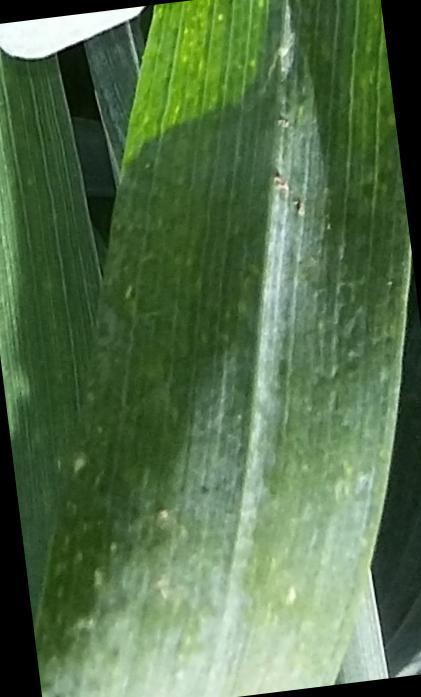

Detected Image:


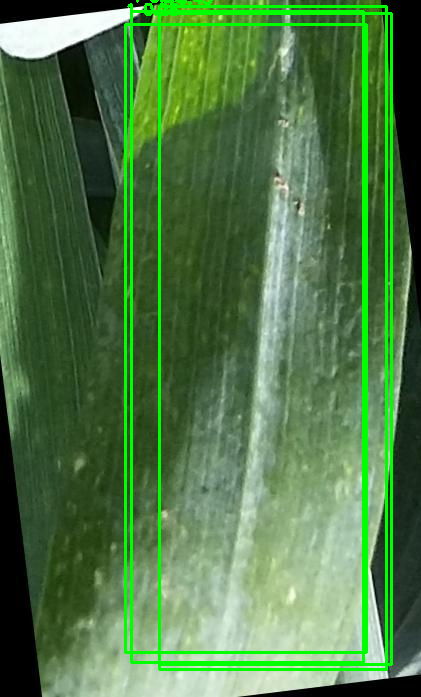

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/WDD/dataset/valid/images/healthy1_jpg.rf.c7d935be4aaae0371c3c06afc490a66b.jpg')
cv2_imshow(original_image)  # Show the original image

# Load YOLO model
net = cv2.dnn.readNetFromDarknet('cfg/yolov4-custom.cfg', '/content/drive/MyDrive/WDD/backup/yolov4-custom_last.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

# Prepare the blob from the image to feed into the YOLO net
blob = cv2.dnn.blobFromImage(original_image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
layer_names = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(layer_names)

# Process detections
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.25:  # Confidence threshold
            center_x = int(detection[0] * original_image.shape[1])
            center_y = int(detection[1] * original_image.shape[0])
            width = int(detection[2] * original_image.shape[1])
            height = int(detection[3] * original_image.shape[0])

            x = int(center_x - width / 2)
            y = int(center_y - height / 2)

            cv2.rectangle(original_image, (x, y), (x + width, y + height), (0, 255, 0), 2)
            cv2.putText(original_image, f"{class_id} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the image with detections
print("Detected Image:")
cv2_imshow(original_image)


In [ ]:
# Try to open the file to ensure it's readable
path_to_train_txt = '/content/drive/MyDrive/WDD/dataset/valid/images/healthy174_jpg.rf.e7e4fc9d314f2aa0b5cd512760624601.txt'
try:
    with open(path_to_train_txt, 'r') as file:
        print("File is accessible and readable.")
        print("First line:", file.readline())
except Exception as e:
    print("Error accessing the file:", e)


File is accessible and readable.
First line: 1 0.43991416309012876 0.47409141583054626 0.3648068669527897 0.7305574136008918
